# Training the model

In [0]:
#extra connected layer and extended dataset EMNIST

from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy
import emnist_loader

training_set, validation_set, test_set = emnist_loader.load_data()


(x_train, y_train) = training_set
(x_val,y_val)= validation_set
(x_test, y_test) = test_set


batch_size = 128
num_classes = 27
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    x_val = x_val.reshape(x_val.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
'''    
from keras.preprocessing.image import ImageDataGenerator
X_train2 = numpy.array(x_train, copy=True) 
y_train2 = numpy.array(y_train, copy=True) 
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    )'''


#datagen.fit(x_train)
#result_x  = numpy.concatenate((x_train, X_train2), axis=0)
#result_y  = numpy.concatenate((y_train, y_train2), axis=0) 



#x_train = result_x.astype('float32')
x_train = x_train.astype('float32')

x_test = x_test.astype('float32')
x_val = x_val.astype('float32')

x_train /= 255
x_test /= 255
x_val /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
'''
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
'''

Using TensorFlow backend.


x_train shape: (104000, 28, 28, 1)
104000 train samples
20800 test samples
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


"\nmodel.fit(x_train, y_train,\n          batch_size=batch_size,\n          epochs=epochs,\n          verbose=1,\n          validation_data=(x_val, y_val))\nscore = model.evaluate(x_test, y_test, verbose=0)\nprint('Test loss:', score[0])\nprint('Test accuracy:', score[1])\n"

## Visualizing the output

Instructions for updating:
Use tf.cast instead.
Train on 104000 samples, validate on 20800 samples
Epoch 1/10
104000/104000 [==============================] - 514s 5ms/step - loss: 0.6987 - acc: 0.7832 - val_loss: 0.2739 - val_acc: 0.9090
Epoch 2/10
104000/104000 [==============================] - 512s 5ms/step - loss: 0.3088 - acc: 0.8993 - val_loss: 0.2247 - val_acc: 0.9268
Epoch 3/10
104000/104000 [==============================] - 511s 5ms/step - loss: 0.2521 - acc: 0.9163 - val_loss: 0.2069 - val_acc: 0.9320
Epoch 4/10
104000/104000 [==============================] - 510s 5ms/step - loss: 0.2171 - acc: 0.9274 - val_loss: 0.1929 - val_acc: 0.9367
Epoch 5/10
104000/104000 [==============================] - 509s 5ms/step - loss: 0.1946 - acc: 0.9344 - val_loss: 0.2031 - val_acc: 0.9305
Epoch 6/10
104000/104000 [==============================] - 509s 5ms/step - loss: 0.1769 - acc: 0.9396 - val_loss: 0.1870 - val_acc: 0.9398
Epoch 7/10
104000/104000 [==============================] - 5

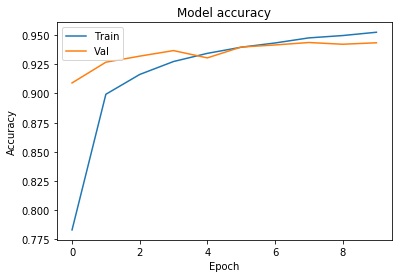

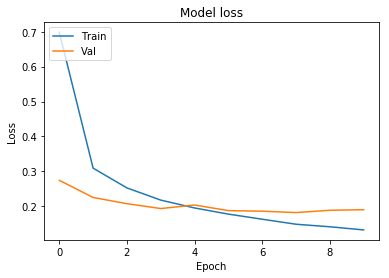

In [0]:
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val))

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])a
print('Test accuracy:', score[1])

Test loss: 0.2599422678419502
Test accuracy: 0.9416346153846153
